In [10]:
#Iniciando o carregamento de todas os datasets, lendo cada um dos arquivos referentes do mês e unindo todos em um
#único dataset para cada ano. O ano de 2012 possui somente do mês de junho a dezembro, os demais possuem todos os 12
#meses daquele ano
import pandas as pd

dados_2012 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2012//planilha_2012{mes}.csv',sep=';') 
                       for mes in ('06','07','08','09','10','11','12'))
dados_2013 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2013//planilha_2013{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2014 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2014//planilha_2014{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2015 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2015//planilha_2015{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2016 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2016//planilha_2016{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2017 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2017//planilha_2017{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2018 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2018//planilha_2018{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2019 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2019//planilha_2019{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2020 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2020//planilha_2020{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11','12'))
dados_2021 = pd.concat(pd.read_csv(f'C://fontes_dados//operacoes_credito//2021//planilha_2021{mes}.csv',sep=';') 
                       for mes in ('01','02','03','04','05','06','07','08','09','10','11'))

dados_2012.to_csv('C://fontes_dados//operacoes_credito//2012//dados_credito_2012.csv',sep=';')
dados_2013.to_csv('C://fontes_dados//operacoes_credito//2013//dados_credito_2013.csv',sep=';')
dados_2014.to_csv('C://fontes_dados//operacoes_credito//2014//dados_credito_2014.csv',sep=';')
dados_2015.to_csv('C://fontes_dados//operacoes_credito//2015//dados_credito_2015.csv',sep=';')
dados_2016.to_csv('C://fontes_dados//operacoes_credito//2016//dados_credito_2016.csv',sep=';')
dados_2017.to_csv('C://fontes_dados//operacoes_credito//2017//dados_credito_2017.csv',sep=';')
dados_2018.to_csv('C://fontes_dados//operacoes_credito//2018//dados_credito_2018.csv',sep=';')
dados_2019.to_csv('C://fontes_dados//operacoes_credito//2019//dados_credito_2019.csv',sep=';')
dados_2020.to_csv('C://fontes_dados//operacoes_credito//2020//dados_credito_2020.csv',sep=';')
dados_2021.to_csv('C://fontes_dados//operacoes_credito//2021//dados_credito_2021.csv',sep=';')



ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [44]:
#Removendo as colunas que se sabe que não serão utilizadas
del dados_2012['sr']
del dados_2012['cnae_secao']
del dados_2012['cnae_subclasse']
del dados_2012['origem']
del dados_2012['indexador']
del dados_2012['porte']
del dados_2012['a_vencer_ate_90_dias']
del dados_2012['a_vencer_de_91_ate_360_dias']
del dados_2012['a_vencer_de_361_ate_1080_dias']   
del dados_2012['a_vencer_de_1081_ate_1800_dias']  
del dados_2012['a_vencer_de_1801_ate_5400_dias']  
del dados_2012['a_vencer_acima_de_5400_dias']     
del dados_2012['vencido_acima_de_15_dias']      
del dados_2012['carteira_inadimplida_arrastada']
del dados_2012['ativo_problematico']

#Tratando o número de operações
dados_2012['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2012['numero_de_operacoes'] = pd.to_numeric(dados_2012['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2012 = dados_2012.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2012['carteira_ativa'] = dados_2012['carteira_ativa'].replace(',','.', regex=True)
dados_2012['carteira_ativa'] = pd.to_numeric(dados_2012['carteira_ativa'])

#Tratando o campo da data
dados_2012['data_base'] = dados_2012['data_base'].replace('-','/', regex=True)
dados_2012['data_base'] = pd.to_datetime(dados_2012['data_base'], format= "%Y/%M/%d")
dados_2012['data_base'] = pd.to_datetime(dados_2012['data_base']).dt.normalize()

dados_2012.info()
dados_2012.to_csv('C://fontes_dados//operacoes_credito//dados_2012')



<ipython-input-44-35d8ddf2188e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2012['carteira_ativa'] = dados_2012['carteira_ativa'].replace(',','.', regex=True)
<ipython-input-44-35d8ddf2188e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2012['carteira_ativa'] = pd.to_numeric(dados_2012['carteira_ativa'])
<ipython-input-44-35d8ddf2188e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<class 'pandas.core.frame.DataFrame'>
Int64Index: 489588 entries, 2994 to 465366
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_base            489588 non-null  datetime64[ns]
 1   uf                   489588 non-null  object        
 2   tcb                  489588 non-null  object        
 3   cliente              489588 non-null  object        
 4   ocupacao             489588 non-null  object        
 5   modalidade           489588 non-null  object        
 6   numero_de_operacoes  489588 non-null  int64         
 7   carteira_ativa       489588 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.6+ MB


In [26]:
#Carregando arquivo do ano de 2013
import pandas as pd
dados_2013 = pd.read_csv('C://fontes_dados//operacoes_credito//2013//dados_credito_2013.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2013['Unnamed: 0']
del dados_2013['sr']
del dados_2013['cnae_secao']
del dados_2013['cnae_subclasse']
del dados_2013['origem']
del dados_2013['indexador']
del dados_2013['porte']
del dados_2013['a_vencer_ate_90_dias']
del dados_2013['a_vencer_de_91_ate_360_dias']
del dados_2013['a_vencer_de_361_ate_1080_dias']   
del dados_2013['a_vencer_de_1081_ate_1800_dias']  
del dados_2013['a_vencer_de_1801_ate_5400_dias']  
del dados_2013['a_vencer_acima_de_5400_dias']     
del dados_2013['vencido_acima_de_15_dias']      
del dados_2013['carteira_inadimplida_arrastada']
del dados_2013['ativo_problematico']

#Tratando o número de operações
dados_2013['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2013['numero_de_operacoes'] = pd.to_numeric(dados_2013['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2013 = dados_2013.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2013['carteira_ativa'] = dados_2013['carteira_ativa'].replace(',','.', regex=True)
dados_2013['carteira_ativa'] = pd.to_numeric(dados_2013['carteira_ativa'])

#Tratando o campo da data
dados_2013['data_base'] = dados_2013['data_base'].replace('-','/', regex=True)
dados_2013['data_base'] = pd.to_datetime(dados_2013['data_base'], format= "%Y/%M/%d")
dados_2013['data_base'] = pd.to_datetime(dados_2013['data_base']).dt.normalize()

dados_2013.info()
dados_2013.to_csv('C://fontes_dados//operacoes_credito//dados_2013')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 923431 entries, 3083 to 5626637
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_base            923431 non-null  datetime64[ns]
 1   uf                   923431 non-null  object        
 2   tcb                  923431 non-null  object        
 3   cliente              923431 non-null  object        
 4   ocupacao             923431 non-null  object        
 5   modalidade           923431 non-null  object        
 6   numero_de_operacoes  923431 non-null  int64         
 7   carteira_ativa       923431 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 63.4+ MB


In [27]:
#Carregando arquivo do ano de 2014
import pandas as pd
dados_2014 = pd.read_csv('C://fontes_dados//operacoes_credito//2014//dados_credito_2014.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2014['Unnamed: 0']
del dados_2014['sr']
del dados_2014['cnae_secao']
del dados_2014['cnae_subclasse']
del dados_2014['origem']
del dados_2014['indexador']
del dados_2014['porte']
del dados_2014['a_vencer_ate_90_dias']
del dados_2014['a_vencer_de_91_ate_360_dias']
del dados_2014['a_vencer_de_361_ate_1080_dias']   
del dados_2014['a_vencer_de_1081_ate_1800_dias']  
del dados_2014['a_vencer_de_1801_ate_5400_dias']  
del dados_2014['a_vencer_acima_de_5400_dias']     
del dados_2014['vencido_acima_de_15_dias']      
del dados_2014['carteira_inadimplida_arrastada']
del dados_2014['ativo_problematico']

#Tratando o número de operações
dados_2014['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2014['numero_de_operacoes'] = pd.to_numeric(dados_2014['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2014 = dados_2014.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2014['carteira_ativa'] = dados_2014['carteira_ativa'].replace(',','.', regex=True)
dados_2014['carteira_ativa'] = pd.to_numeric(dados_2014['carteira_ativa'])

#Tratando o campo da data
dados_2014['data_base'] = dados_2014['data_base'].replace('-','/', regex=True)
dados_2014['data_base'] = pd.to_datetime(dados_2014['data_base'], format= "%Y/%M/%d")
dados_2014['data_base'] = pd.to_datetime(dados_2014['data_base']).dt.normalize()

dados_2014.info()
dados_2014.to_csv('C://fontes_dados//operacoes_credito//dados_2014')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 996979 entries, 3119 to 5646664
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_base            996979 non-null  datetime64[ns]
 1   uf                   996979 non-null  object        
 2   tcb                  996979 non-null  object        
 3   cliente              996979 non-null  object        
 4   ocupacao             996979 non-null  object        
 5   modalidade           996979 non-null  object        
 6   numero_de_operacoes  996979 non-null  int64         
 7   carteira_ativa       996979 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 68.5+ MB


In [28]:
#Carregando arquivo do ano de 2015
import pandas as pd
dados_2015 = pd.read_csv('C://fontes_dados//operacoes_credito//2015//dados_credito_2015.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2015['Unnamed: 0']
del dados_2015['sr']
del dados_2015['cnae_secao']
del dados_2015['cnae_subclasse']
del dados_2015['origem']
del dados_2015['indexador']
del dados_2015['porte']
del dados_2015['a_vencer_ate_90_dias']
del dados_2015['a_vencer_de_91_ate_360_dias']
del dados_2015['a_vencer_de_361_ate_1080_dias']   
del dados_2015['a_vencer_de_1081_ate_1800_dias']  
del dados_2015['a_vencer_de_1801_ate_5400_dias']  
del dados_2015['a_vencer_acima_de_5400_dias']     
del dados_2015['vencido_acima_de_15_dias']      
del dados_2015['carteira_inadimplida_arrastada']
del dados_2015['ativo_problematico']

#Tratando o número de operações
dados_2015['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2015['numero_de_operacoes'] = pd.to_numeric(dados_2015['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2015 = dados_2015.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2015['carteira_ativa'] = dados_2015['carteira_ativa'].replace(',','.', regex=True)
dados_2015['carteira_ativa'] = pd.to_numeric(dados_2015['carteira_ativa'])

#Tratando o campo da data
dados_2015['data_base'] = dados_2015['data_base'].replace('-','/', regex=True)
dados_2015['data_base'] = pd.to_datetime(dados_2015['data_base'], format= "%Y/%M/%d")
dados_2015['data_base'] = pd.to_datetime(dados_2015['data_base']).dt.normalize()

dados_2015.info()
dados_2015.to_csv('C://fontes_dados//operacoes_credito//dados_2015')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099063 entries, 3314 to 5641162
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   data_base            1099063 non-null  datetime64[ns]
 1   uf                   1099063 non-null  object        
 2   tcb                  1099063 non-null  object        
 3   cliente              1099063 non-null  object        
 4   ocupacao             1099063 non-null  object        
 5   modalidade           1099063 non-null  object        
 6   numero_de_operacoes  1099063 non-null  int64         
 7   carteira_ativa       1099063 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 75.5+ MB


In [29]:
#Carregando arquivo do ano de 2016
import pandas as pd
dados_2016 = pd.read_csv('C://fontes_dados//operacoes_credito//2016//dados_credito_2016.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2016['Unnamed: 0']
del dados_2016['sr']
del dados_2016['cnae_secao']
del dados_2016['cnae_subclasse']
del dados_2016['origem']
del dados_2016['indexador']
del dados_2016['porte']
del dados_2016['a_vencer_ate_90_dias']
del dados_2016['a_vencer_de_91_ate_360_dias']
del dados_2016['a_vencer_de_361_ate_1080_dias']   
del dados_2016['a_vencer_de_1081_ate_1800_dias']  
del dados_2016['a_vencer_de_1801_ate_5400_dias']  
del dados_2016['a_vencer_acima_de_5400_dias']     
del dados_2016['vencido_acima_de_15_dias']      
del dados_2016['carteira_inadimplida_arrastada']
del dados_2016['ativo_problematico']

#Tratando o número de operações
dados_2016['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2016['numero_de_operacoes'] = pd.to_numeric(dados_2016['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2016 = dados_2016.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2016['carteira_ativa'] = dados_2016['carteira_ativa'].replace(',','.', regex=True)
dados_2016['carteira_ativa'] = pd.to_numeric(dados_2016['carteira_ativa'])

#Tratando o campo da data
dados_2016['data_base'] = dados_2016['data_base'].replace('-','/', regex=True)
dados_2016['data_base'] = pd.to_datetime(dados_2016['data_base'], format= "%Y/%M/%d")
dados_2016['data_base'] = pd.to_datetime(dados_2016['data_base']).dt.normalize()

dados_2016.info()
dados_2016.to_csv('C://fontes_dados//operacoes_credito//dados_2016')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179425 entries, 3443 to 5699393
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   data_base            1179425 non-null  datetime64[ns]
 1   uf                   1179425 non-null  object        
 2   tcb                  1179425 non-null  object        
 3   cliente              1179425 non-null  object        
 4   ocupacao             1179425 non-null  object        
 5   modalidade           1179425 non-null  object        
 6   numero_de_operacoes  1179425 non-null  int64         
 7   carteira_ativa       1179425 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 81.0+ MB


In [30]:
#Carregando arquivo do ano de 2017
import pandas as pd
dados_2017 = pd.read_csv('C://fontes_dados//operacoes_credito//2017//dados_credito_2017.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2017['Unnamed: 0']
del dados_2017['sr']
del dados_2017['cnae_secao']
del dados_2017['cnae_subclasse']
del dados_2017['origem']
del dados_2017['indexador']
del dados_2017['porte']
del dados_2017['a_vencer_ate_90_dias']
del dados_2017['a_vencer_de_91_ate_360_dias']
del dados_2017['a_vencer_de_361_ate_1080_dias']   
del dados_2017['a_vencer_de_1081_ate_1800_dias']  
del dados_2017['a_vencer_de_1801_ate_5400_dias']  
del dados_2017['a_vencer_acima_de_5400_dias']     
del dados_2017['vencido_acima_de_15_dias']      
del dados_2017['carteira_inadimplida_arrastada']
del dados_2017['ativo_problematico']

#Tratando o número de operações
dados_2017['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2017['numero_de_operacoes'] = pd.to_numeric(dados_2017['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2017 = dados_2017.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2017['carteira_ativa'] = dados_2017['carteira_ativa'].replace(',','.', regex=True)
dados_2017['carteira_ativa'] = pd.to_numeric(dados_2017['carteira_ativa'])

#Tratando o campo da data
dados_2017['data_base'] = dados_2017['data_base'].replace('-','/', regex=True)
dados_2017['data_base'] = pd.to_datetime(dados_2017['data_base'], format= "%Y/%M/%d")
dados_2017['data_base'] = pd.to_datetime(dados_2017['data_base']).dt.normalize()

dados_2017.info()
dados_2017.to_csv('C://fontes_dados//operacoes_credito//dados_2017')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536048 entries, 4262 to 7513790
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   data_base            1536048 non-null  datetime64[ns]
 1   uf                   1536048 non-null  object        
 2   tcb                  1536048 non-null  object        
 3   cliente              1536048 non-null  object        
 4   ocupacao             1536048 non-null  object        
 5   modalidade           1536048 non-null  object        
 6   numero_de_operacoes  1536048 non-null  int64         
 7   carteira_ativa       1536048 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 105.5+ MB


In [31]:
#Carregando arquivo do ano de 2018
import pandas as pd
dados_2018 = pd.read_csv('C://fontes_dados//operacoes_credito//2018//dados_credito_2018.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2018['Unnamed: 0']
del dados_2018['sr']
del dados_2018['cnae_secao']
del dados_2018['cnae_subclasse']
del dados_2018['origem']
del dados_2018['indexador']
del dados_2018['porte']
del dados_2018['a_vencer_ate_90_dias']
del dados_2018['a_vencer_de_91_ate_360_dias']
del dados_2018['a_vencer_de_361_ate_1080_dias']   
del dados_2018['a_vencer_de_1081_ate_1800_dias']  
del dados_2018['a_vencer_de_1801_ate_5400_dias']  
del dados_2018['a_vencer_acima_de_5400_dias']     
del dados_2018['vencido_acima_de_15_dias']      
del dados_2018['carteira_inadimplida_arrastada']
del dados_2018['ativo_problematico']

#Tratando o número de operações
dados_2018['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2018['numero_de_operacoes'] = pd.to_numeric(dados_2018['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2018 = dados_2018.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2018['carteira_ativa'] = dados_2018['carteira_ativa'].replace(',','.', regex=True)
dados_2018['carteira_ativa'] = pd.to_numeric(dados_2018['carteira_ativa'])

#Tratando o campo da data
dados_2018['data_base'] = dados_2018['data_base'].replace('-','/', regex=True)
dados_2018['data_base'] = pd.to_datetime(dados_2018['data_base'], format= "%Y/%M/%d")
dados_2018['data_base'] = pd.to_datetime(dados_2018['data_base']).dt.normalize()

dados_2018.info()
dados_2018.to_csv('C://fontes_dados//operacoes_credito//dados_2018')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642274 entries, 4096 to 7417813
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   data_base            1642274 non-null  datetime64[ns]
 1   uf                   1642274 non-null  object        
 2   tcb                  1642274 non-null  object        
 3   cliente              1642274 non-null  object        
 4   ocupacao             1642274 non-null  object        
 5   modalidade           1642274 non-null  object        
 6   numero_de_operacoes  1642274 non-null  int64         
 7   carteira_ativa       1642274 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 112.8+ MB


In [34]:
#Carregando arquivo do ano de 2019
import pandas as pd
dados_2019 = pd.read_csv('C://fontes_dados//operacoes_credito//2019//dados_credito_2019.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2019['Unnamed: 0']
del dados_2019['sr']
del dados_2019['cnae_secao']
del dados_2019['cnae_subclasse']
del dados_2019['origem']
del dados_2019['indexador']
del dados_2019['porte']
del dados_2019['a_vencer_ate_90_dias']
del dados_2019['a_vencer_de_91_ate_360_dias']
del dados_2019['a_vencer_de_361_ate_1080_dias']   
del dados_2019['a_vencer_de_1081_ate_1800_dias']  
del dados_2019['a_vencer_de_1801_ate_5400_dias']  
del dados_2019['a_vencer_acima_de_5400_dias']     
del dados_2019['vencido_acima_de_15_dias']      
del dados_2019['carteira_inadimplida_arrastada']
del dados_2019['ativo_problematico']

#Tratando o número de operações
dados_2019['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2019['numero_de_operacoes'] = pd.to_numeric(dados_2019['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2019 = dados_2019.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2019['carteira_ativa'] = dados_2019['carteira_ativa'].replace(',','.', regex=True)
dados_2019['carteira_ativa'] = pd.to_numeric(dados_2019['carteira_ativa'])

#Tratando o campo da data
dados_2019['data_base'] = dados_2019['data_base'].replace('-','/', regex=True)
dados_2019['data_base'] = pd.to_datetime(dados_2019['data_base'], format= "%Y/%M/%d")
dados_2019['data_base'] = pd.to_datetime(dados_2019['data_base']).dt.normalize()

dados_2019.info()
dados_2019.to_csv('C://fontes_dados//operacoes_credito//dados_2019')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851583 entries, 4022 to 7610762
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   data_base            datetime64[ns]
 1   uf                   object        
 2   tcb                  object        
 3   cliente              object        
 4   ocupacao             object        
 5   modalidade           object        
 6   numero_de_operacoes  int64         
 7   carteira_ativa       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 127.1+ MB


In [33]:
#Carregando arquivo do ano de 2018
import pandas as pd
dados_2018 = pd.read_csv('C://fontes_dados//operacoes_credito//2018//dados_credito_2018.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2018['Unnamed: 0']
del dados_2018['sr']
del dados_2018['cnae_secao']
del dados_2018['cnae_subclasse']
del dados_2018['origem']
del dados_2018['indexador']
del dados_2018['porte']
del dados_2018['a_vencer_ate_90_dias']
del dados_2018['a_vencer_de_91_ate_360_dias']
del dados_2018['a_vencer_de_361_ate_1080_dias']   
del dados_2018['a_vencer_de_1081_ate_1800_dias']  
del dados_2018['a_vencer_de_1801_ate_5400_dias']  
del dados_2018['a_vencer_acima_de_5400_dias']     
del dados_2018['vencido_acima_de_15_dias']      
del dados_2018['carteira_inadimplida_arrastada']
del dados_2018['ativo_problematico']

#Tratando o número de operações
dados_2018['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2018['numero_de_operacoes'] = pd.to_numeric(dados_2018['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2018 = dados_2018.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2018['carteira_ativa'] = dados_2018['carteira_ativa'].replace(',','.', regex=True)
dados_2018['carteira_ativa'] = pd.to_numeric(dados_2018['carteira_ativa'])

#Tratando o campo da data
dados_2018['data_base'] = dados_2018['data_base'].replace('-','/', regex=True)
dados_2018['data_base'] = pd.to_datetime(dados_2018['data_base'], format= "%Y/%M/%d")
dados_2018['data_base'] = pd.to_datetime(dados_2018['data_base']).dt.normalize()

dados_2018.info()
dados_2018.to_csv('C://fontes_dados//operacoes_credito//dados_2018')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642274 entries, 4096 to 7417813
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   data_base            1642274 non-null  datetime64[ns]
 1   uf                   1642274 non-null  object        
 2   tcb                  1642274 non-null  object        
 3   cliente              1642274 non-null  object        
 4   ocupacao             1642274 non-null  object        
 5   modalidade           1642274 non-null  object        
 6   numero_de_operacoes  1642274 non-null  int64         
 7   carteira_ativa       1642274 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 112.8+ MB


In [35]:
#Carregando arquivo do ano de 2020
import pandas as pd
dados_2020 = pd.read_csv('C://fontes_dados//operacoes_credito//2020//dados_credito_2020.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2020['Unnamed: 0']
del dados_2020['sr']
del dados_2020['cnae_secao']
del dados_2020['cnae_subclasse']
del dados_2020['origem']
del dados_2020['indexador']
del dados_2020['porte']
del dados_2020['a_vencer_ate_90_dias']
del dados_2020['a_vencer_de_91_ate_360_dias']
del dados_2020['a_vencer_de_361_ate_1080_dias']   
del dados_2020['a_vencer_de_1081_ate_1800_dias']  
del dados_2020['a_vencer_de_1801_ate_5400_dias']  
del dados_2020['a_vencer_acima_de_5400_dias']     
del dados_2020['vencido_acima_de_15_dias']      
del dados_2020['carteira_inadimplida_arrastada']
del dados_2020['ativo_problematico']

#Tratando o número de operações
dados_2020['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2020['numero_de_operacoes'] = pd.to_numeric(dados_2020['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2020 = dados_2020.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2020['carteira_ativa'] = dados_2020['carteira_ativa'].replace(',','.', regex=True)
dados_2020['carteira_ativa'] = pd.to_numeric(dados_2020['carteira_ativa'])

#Tratando o campo da data
dados_2020['data_base'] = dados_2020['data_base'].replace('-','/', regex=True)
dados_2020['data_base'] = pd.to_datetime(dados_2020['data_base'], format= "%Y/%M/%d")
dados_2020['data_base'] = pd.to_datetime(dados_2020['data_base']).dt.normalize()

dados_2020.info()
dados_2020.to_csv('C://fontes_dados//operacoes_credito//dados_2020')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095319 entries, 4216 to 8090569
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   data_base            datetime64[ns]
 1   uf                   object        
 2   tcb                  object        
 3   cliente              object        
 4   ocupacao             object        
 5   modalidade           object        
 6   numero_de_operacoes  int64         
 7   carteira_ativa       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 143.9+ MB


In [36]:
#Carregando arquivo do ano de 2021
import pandas as pd
dados_2021 = pd.read_csv('C://fontes_dados//operacoes_credito//2021//dados_credito_2021.csv',sep=';') 

#Removendo as colunas que se sabe que não serão utilizadas
del dados_2021['Unnamed: 0']
del dados_2021['sr']
del dados_2021['cnae_secao']
del dados_2021['cnae_subclasse']
del dados_2021['origem']
del dados_2021['indexador']
del dados_2021['porte']
del dados_2021['a_vencer_ate_90_dias']
del dados_2021['a_vencer_de_91_ate_360_dias']
del dados_2021['a_vencer_de_361_ate_1080_dias']   
del dados_2021['a_vencer_de_1081_ate_1800_dias']  
del dados_2021['a_vencer_de_1801_ate_5400_dias']  
del dados_2021['a_vencer_acima_de_5400_dias']     
del dados_2021['vencido_acima_de_15_dias']      
del dados_2021['carteira_inadimplida_arrastada']
del dados_2021['ativo_problematico']

#Tratando o número de operações
dados_2021['numero_de_operacoes'].replace('<= 15','15', inplace = True)
dados_2021['numero_de_operacoes'] = pd.to_numeric(dados_2021['numero_de_operacoes'])

#Filtrando somente registros de Cooperativas
dados_2021 = dados_2021.query('tcb == "Cooperativas"')

#Tratando o campo da carteira ativa
dados_2021['carteira_ativa'] = dados_2021['carteira_ativa'].replace(',','.', regex=True)
dados_2021['carteira_ativa'] = pd.to_numeric(dados_2021['carteira_ativa'])

#Tratando o campo da data
dados_2021['data_base'] = dados_2021['data_base'].replace('-','/', regex=True)
dados_2021['data_base'] = pd.to_datetime(dados_2021['data_base'], format= "%Y/%M/%d")
dados_2021['data_base'] = pd.to_datetime(dados_2021['data_base']).dt.normalize()

dados_2021.info()
dados_2021.to_csv('C://fontes_dados//operacoes_credito//dados_2021')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175491 entries, 4443 to 8262702
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   data_base            datetime64[ns]
 1   uf                   object        
 2   tcb                  object        
 3   cliente              object        
 4   ocupacao             object        
 5   modalidade           object        
 6   numero_de_operacoes  int64         
 7   carteira_ativa       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 149.4+ MB


In [ ]:
#Unindo todos os datasets em um único
dados_completos

In [55]:

agrupado_qtde_2012 = pd.DataFrame(dados_2012.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2012)
agrupado_qtde_2013 = pd.DataFrame(dados_2013.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2013)
agrupado_qtde_2014 = pd.DataFrame(dados_2014.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2014)
agrupado_qtde_2015 = pd.DataFrame(dados_2015.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2015)
agrupado_qtde_2016 = pd.DataFrame(dados_2016.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2016)
agrupado_qtde_2017 = pd.DataFrame(dados_2017.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2017)
agrupado_qtde_2018 = pd.DataFrame(dados_2018.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2018)
agrupado_qtde_2019 = pd.DataFrame(dados_2019.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2019)
agrupado_qtde_2020 = pd.DataFrame(dados_2020.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2020)
agrupado_qtde_2021 = pd.DataFrame(dados_2021.groupby('uf')['numero_de_operacoes'].sum()).assign(ano=2021)

agrupados_geral = pd.concat([agrupado_qtde_2012, 
                             agrupado_qtde_2013, 
                             agrupado_qtde_2014, 
                             agrupado_qtde_2015, 
                             agrupado_qtde_2016, 
                             agrupado_qtde_2017, 
                             agrupado_qtde_2018, 
                             agrupado_qtde_2019, 
                             agrupado_qtde_2020, 
                             agrupado_qtde_2021])

agrupados_geral = agrupados_geral.reset_index()  

In [62]:
agrupados_geral = pd.concat([agrupado_qtde_2012, 
                             agrupado_qtde_2013, 
                             agrupado_qtde_2014, 
                             agrupado_qtde_2015, 
                             agrupado_qtde_2016, 
                             agrupado_qtde_2017, 
                             agrupado_qtde_2018, 
                             agrupado_qtde_2019, 
                             agrupado_qtde_2020, 
                             agrupado_qtde_2021])

agrupados_geral = agrupados_geral.reset_index()                  

In [72]:
agrupados_geral_ano = pd.DataFrame(agrupados_geral.groupby('ano')['numero_de_operacoes'].sum()).reset_index()     
agrupados_geral_ano

,ano,numero_de_operacoes
0,2012,40017751
1,2013,75866976
2,2014,85021173
3,2015,93005704
4,2016,100406556
5,2017,109269246
6,2018,118272280
7,2019,137500248
8,2020,146352964
9,2021,151976845


In [78]:
agrupados_geral_ano['ano'] =  agrupados_geral_ano['ano'].astype(str)
agrupados_geral_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ano                  10 non-null     object
 1   numero_de_operacoes  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


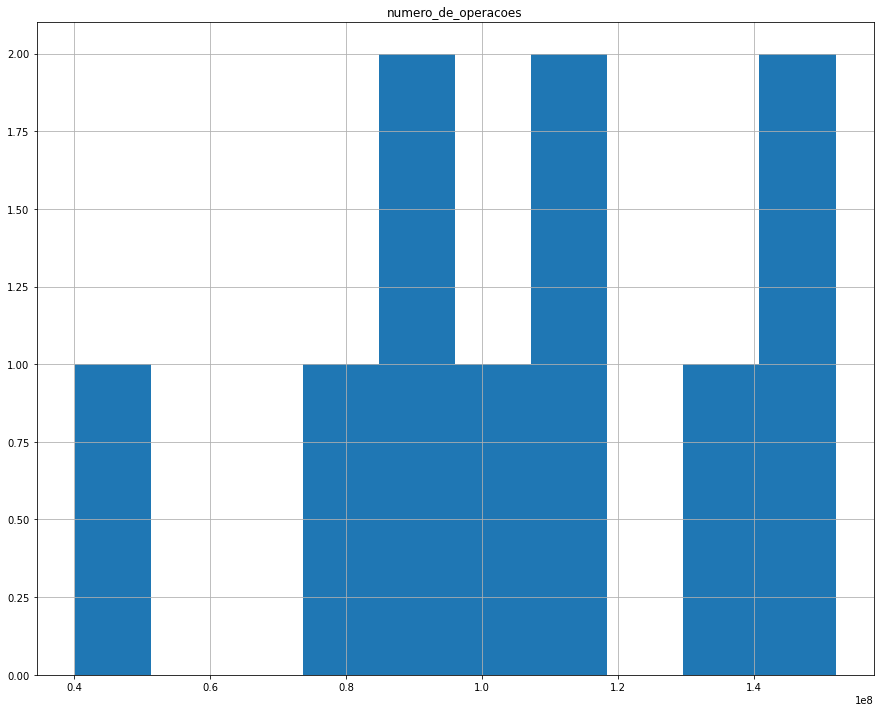

In [81]:
agrupados_geral_ano.hist(figsize=(15,12));

<AxesSubplot:xlabel='ano'>

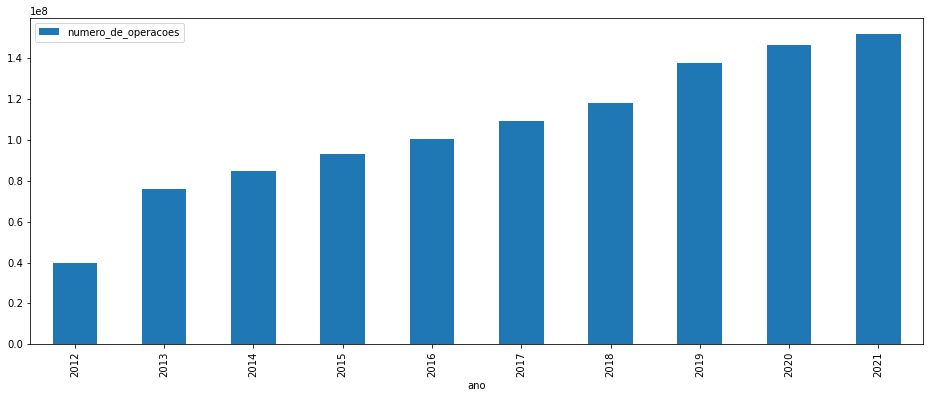

In [89]:
agrupados_geral_ano.plot(x = 'ano',
         y = ['numero_de_operacoes'], 
          kind = 'bar', 
          stacked=True, 
          legend=True, 
          figsize=(16, 6))

<AxesSubplot:xlabel='ano'>

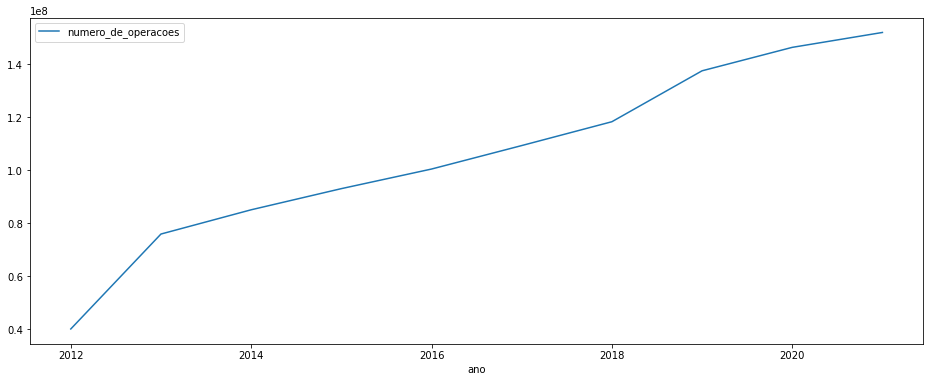

In [90]:
agrupados_geral_ano.plot(x = 'ano',
         y = ['numero_de_operacoes'], 
          kind = 'line', 
          stacked=True, 
          legend=True, 
          figsize=(16, 6))

In [107]:
agrupado_qtde_2012 = pd.DataFrame(dados_2012.groupby('uf')['carteira_ativa'].sum()).assign(ano=2012)
agrupado_qtde_2013 = pd.DataFrame(dados_2013.groupby('uf')['carteira_ativa'].sum()).assign(ano=2013)
agrupado_qtde_2014 = pd.DataFrame(dados_2014.groupby('uf')['carteira_ativa'].sum()).assign(ano=2014)
agrupado_qtde_2015 = pd.DataFrame(dados_2015.groupby('uf')['carteira_ativa'].sum()).assign(ano=2015)
agrupado_qtde_2016 = pd.DataFrame(dados_2016.groupby('uf')['carteira_ativa'].sum()).assign(ano=2016)
agrupado_qtde_2017 = pd.DataFrame(dados_2017.groupby('uf')['carteira_ativa'].sum()).assign(ano=2017)
agrupado_qtde_2018 = pd.DataFrame(dados_2018.groupby('uf')['carteira_ativa'].sum()).assign(ano=2018)
agrupado_qtde_2019 = pd.DataFrame(dados_2019.groupby('uf')['carteira_ativa'].sum()).assign(ano=2019)
agrupado_qtde_2020 = pd.DataFrame(dados_2020.groupby('uf')['carteira_ativa'].sum()).assign(ano=2020)
agrupado_qtde_2021 = pd.DataFrame(dados_2021.groupby('uf')['carteira_ativa'].sum()).assign(ano=2021)

agrupados_geral_valores = pd.concat([agrupado_qtde_2012, 
                             agrupado_qtde_2013, 
                             agrupado_qtde_2014, 
                             agrupado_qtde_2015, 
                             agrupado_qtde_2016, 
                             agrupado_qtde_2017, 
                             agrupado_qtde_2018, 
                             agrupado_qtde_2019, 
                             agrupado_qtde_2020, 
                             agrupado_qtde_2021])

agrupados_geral_valores = agrupados_geral_valores.reset_index() 

agrupados_geral_valores_ano = pd.DataFrame(agrupados_geral_valores.groupby('ano')['carteira_ativa'].sum()).reset_index()     

agrupados_geral_valores_ano['ano'] =  agrupados_geral_valores_ano['ano'].astype(str)


<AxesSubplot:xlabel='ano'>

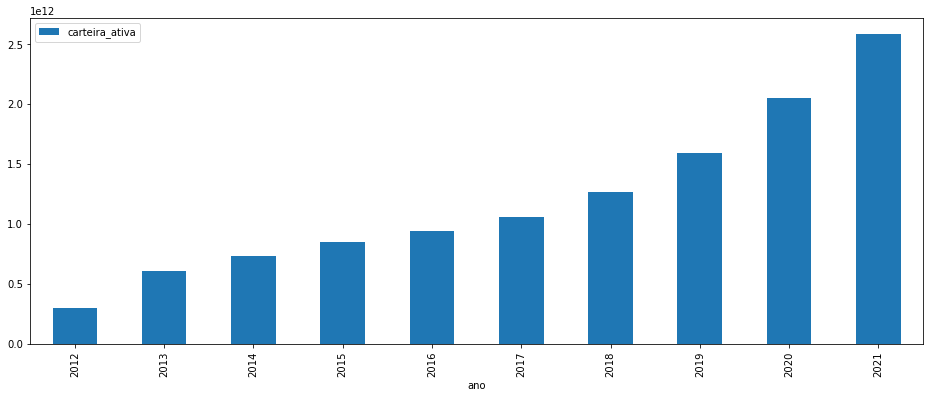

In [108]:
agrupados_geral_valores_ano.plot(x = 'ano',
         y = ['carteira_ativa'], 
          kind = 'bar', 
          stacked=True, 
          legend=True, 
          figsize=(16, 6))

<AxesSubplot:xlabel='ano'>

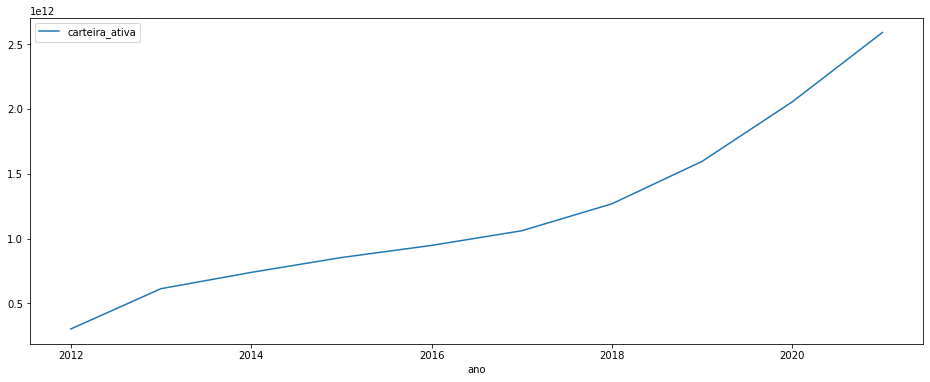

In [101]:
agrupados_geral_valores_ano.plot(x = 'ano',
         y = ['carteira_ativa'], 
          kind = 'line', 
          stacked=True, 
          legend=True, 
          figsize=(16, 6))

In [109]:
quantidades_x_valores_ano = pd.merge(agrupados_geral_ano,agrupados_geral_valores_ano,how = 'inner', on = 'ano')

import matplotlib.pyplot as pltquantidades_x_valores_ano

,ano,numero_de_operacoes,carteira_ativa
0,2012,40017751,3.020621e+11
1,2013,75866976,6.129045e+11
2,2014,85021173,7.385335e+11
3,2015,93005704,8.531138e+11
4,2016,100406556,9.467800e+11
5,2017,109269246,1.059807e+12
6,2018,118272280,1.267748e+12
7,2019,137500248,1.595178e+12
8,2020,146352964,2.054440e+12
9,2021,151976845,2.589876e+12


<AxesSubplot:xlabel='ano'>

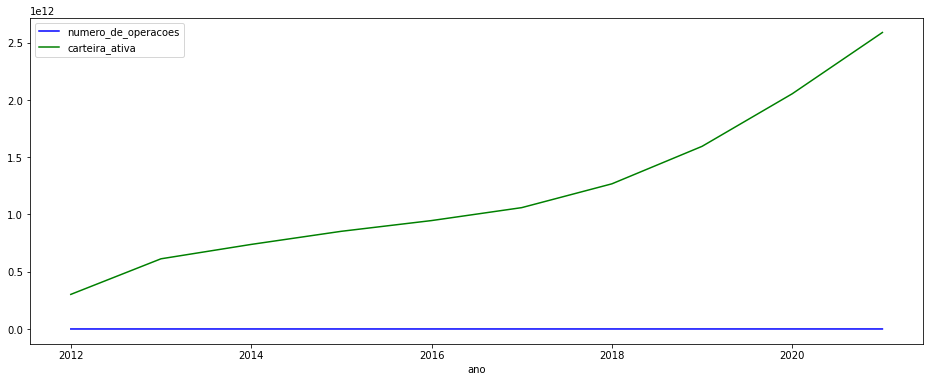

In [116]:
cores = ['blue', 'green']
quantidades_x_valores_ano.plot(x = 'ano', 
                       y = ['numero_de_operacoes','carteira_ativa'], 
                      kind = 'line', 
                      stacked=True, 
                      legend=True, 
                      color = cores,
                      figsize=(16, 6))


<AxesSubplot:>

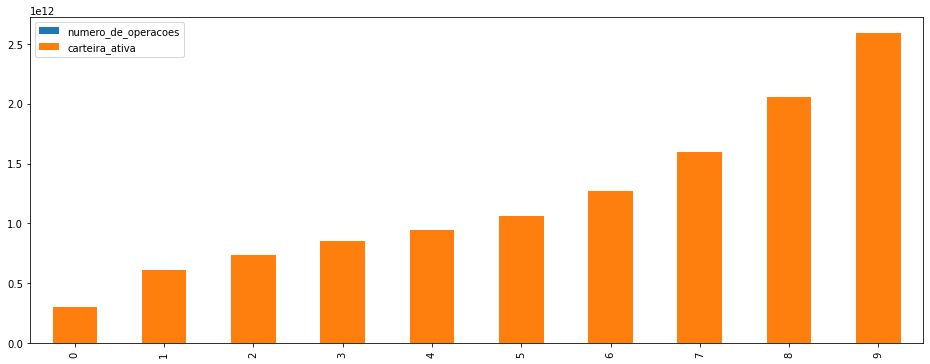

In [113]:
quantidades_x_valores_ano.plot.bar(stacked=True,figsize=(16, 6))

<AxesSubplot:xlabel='ano'>

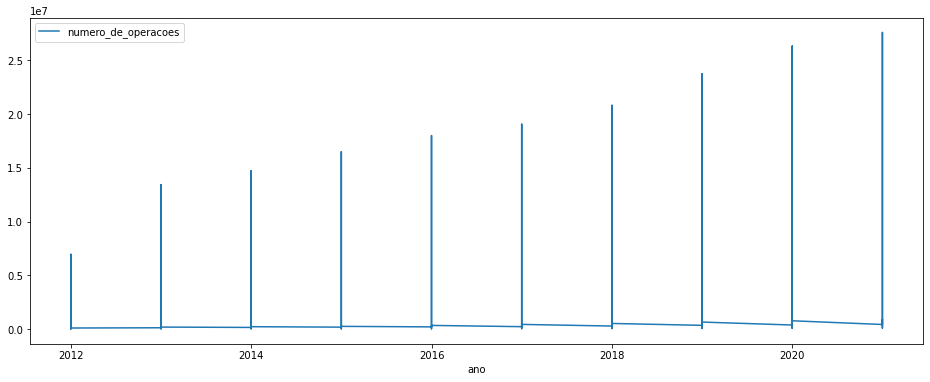

In [119]:
agrupados_geral.plot(x = 'ano',y = 'numero_de_operacoes',figsize=(16, 6))

In [172]:
todos_dados = pd.concat([dados_2012, 
                         dados_2013, 
                         dados_2014, 
                         dados_2015, 
                         dados_2016, 
                         dados_2017, 
                         dados_2018, 
                         dados_2019, 
                         dados_2020, 
                         dados_2021])

todos_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13989201 entries, 2994 to 8262702
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   data_base            datetime64[ns]
 1   uf                   object        
 2   tcb                  object        
 3   cliente              object        
 4   ocupacao             object        
 5   modalidade           object        
 6   numero_de_operacoes  int64         
 7   carteira_ativa       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 960.6+ MB


In [121]:
todos_dados

,data_base,uf,tcb,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa
2994,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Outros créditos,15,197769.70
2995,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,44589.70
2996,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,4453.96
2997,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo sem consignação em folha,15,37972.31
2998,2012-01-30,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,18447.75
...,...,...,...,...,...,...,...,...
8262698,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,42058.36
8262699,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,15325.74
8262700,2021-01-30,TO,Cooperativas,PJ,-,PJ - Capital de giro rotativo,15,10.58
8262701,2021-01-30,TO,Cooperativas,PJ,-,PJ - Investimento,15,123221.52


In [122]:
agrupados_uf = pd.DataFrame(todos_dados.groupby('uf')['carteira_ativa'].sum())
agrupados_uf = agrupados_uf.reset_index()

,carteira_ativa
uf,
AC,2.154416e+10
AL,4.512076e+10
AM,2.237307e+10
AP,4.234354e+09
BA,1.230140e+11
CE,5.218705e+10
DF,1.076065e+11
ES,4.130477e+11
GO,5.208936e+11


In [126]:
agrupados_uf = agrupados_ano.reset_index()

<AxesSubplot:xlabel='uf'>

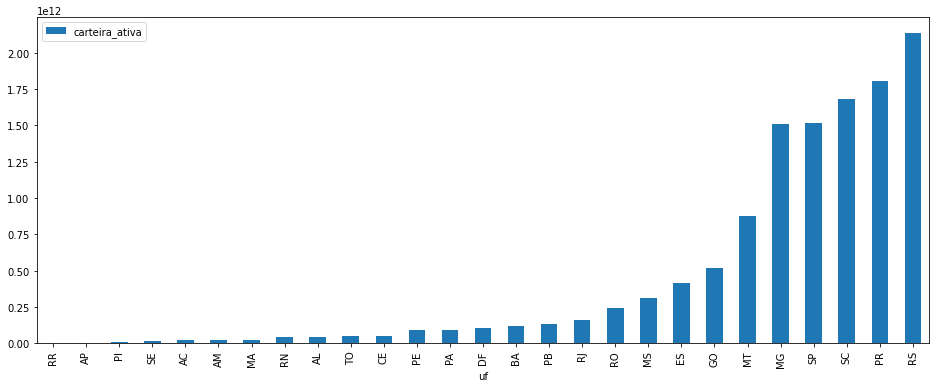

In [133]:
agrupados_uf = pd.DataFrame(todos_dados.groupby('uf')['carteira_ativa'].sum())
agrupados_uf = agrupados_uf.reset_index()
agrupados_uf = agrupados_uf.sort_values(by=['carteira_ativa'])
agrupados_uf.plot(x='uf', y='carteira_ativa', kind='bar', stacked=True,figsize=(16, 6))

In [163]:
todos_dados['modalidade'].unique()

array(['PF - Outros créditos', 'PF - Empréstimo com consignação em folha',
       'PF - Empréstimo sem consignação em folha', 'PF - Veículos',
       'PF - Cartão de crédito', 'PF - Rural e agroindustrial',
       'PJ - Capital de giro rotativo', 'PJ - Outros créditos',
       'PJ - Investimento', 'PJ - Capital de giro',
       'PJ - Operações com recebíveis',
       'PJ - Financiamento de infraestrutura/desenvolvimento/projeto e outros créditos',
       'PJ - Rural e agroindustrial', 'PF - Habitacional'], dtype=object)

<AxesSubplot:xlabel='modalidade'>

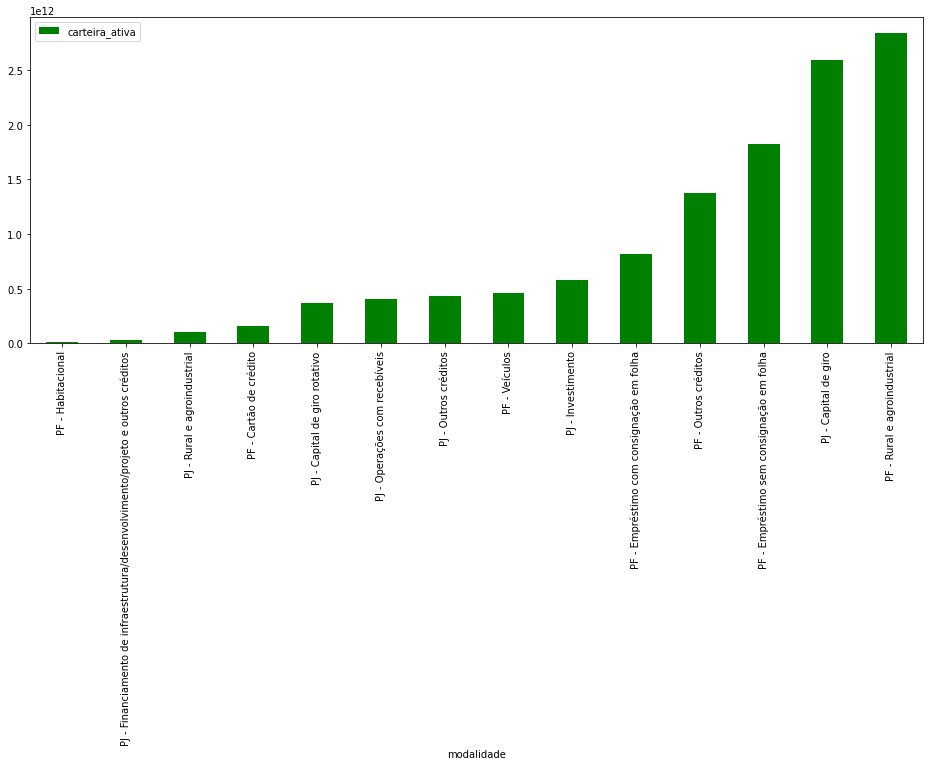

In [165]:
todos_modalidade = pd.DataFrame(todos_dados.groupby('modalidade')['carteira_ativa'].sum())
todos_modalidade = todos_modalidade.reset_index()
todos_modalidade = todos_modalidade.sort_values(by=['carteira_ativa'])
todos_modalidade.plot(x='modalidade', y='carteira_ativa', kind='bar', color = 'green', stacked=True,figsize=(16, 6))


<AxesSubplot:xlabel='data_base'>

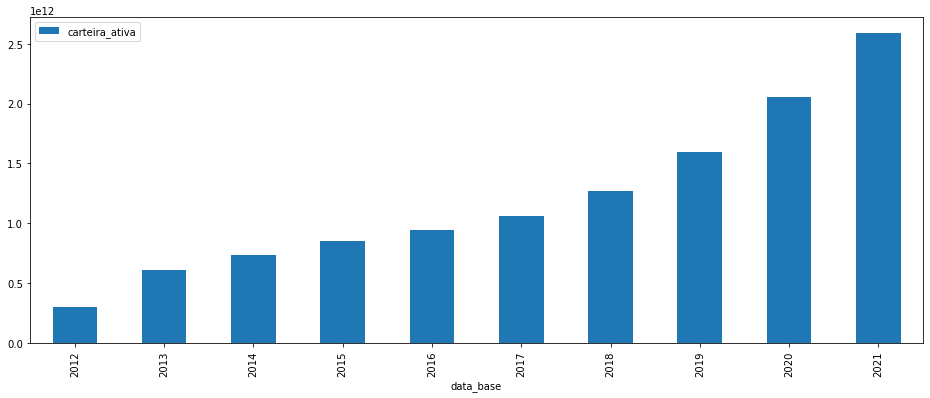

<AxesSubplot:xlabel='cliente'>

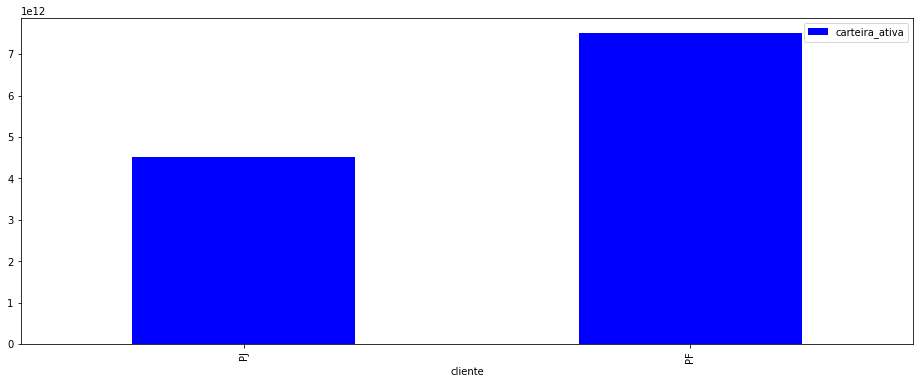

In [187]:
tipo_pessoa = pd.DataFrame(todos_dados.groupby('cliente')['carteira_ativa'].sum())
tipo_pessoa = tipo_pessoa.reset_index()
tipo_pessoa = tipo_pessoa.sort_values(by=['carteira_ativa'])
tipo_pessoa.plot(x='cliente', y='carteira_ativa', kind='bar', color = 'blue', stacked=True,figsize=(16, 6))


In [188]:
print('Valor máximo contratado...........: ', todos_dados['carteira_ativa'].max())
print('Valor mínimo contratado...........: ', todos_dados['carteira_ativa'].min())
print('Valor médio contratado............: ', todos_dados['carteira_ativa'].mean())
print('Amplitude.........................: ', todos_dados['carteira_ativa'].max() - todos_dados['carteira_ativa'].min())
print('Variância valor contratado........: ', todos_dados['carteira_ativa'].var())
print('Desvio padrão valor contratado....: ', todos_dados['carteira_ativa'].std())
print('Mediana valor contratado..........: ', todos_dados['carteira_ativa'].median())
print('Moda valor contratado.............: ', todos_dados['carteira_ativa'].mode())

Valor máximo contratado...........:  2491590036.05
Valor mínimo contratado...........:  0.36
Valor médio contratado............:  859265.9120268021
Amplitude.........................:  2491590035.69
Variância valor contratado........:  107103447153740.97
Desvio padrão valor contratado....:  10349079.531713966
Mediana valor contratado..........:  51967.06
Moda valor contratado.............:  0    5000.0
dtype: float64


In [162]:
todos_dados

,data_base,uf,tcb,cliente,ocupacao,modalidade,numero_de_operacoes,carteira_ativa
2994,2012,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Outros créditos,15,197769.70
2995,2012,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,44589.70
2996,2012,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,4453.96
2997,2012,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo sem consignação em folha,15,37972.31
2998,2012,AC,Cooperativas,PF,PF - Aposentado/pensionista,PF - Empréstimo com consignação em folha,15,18447.75
...,...,...,...,...,...,...,...,...
8262698,2021,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,42058.36
8262699,2021,TO,Cooperativas,PJ,-,PJ - Capital de giro,15,15325.74
8262700,2021,TO,Cooperativas,PJ,-,PJ - Capital de giro rotativo,15,10.58
8262701,2021,TO,Cooperativas,PJ,-,PJ - Investimento,15,123221.52
